Please use this structure for your report, but you do not have to
slavishly follow this template. All bullet points are merely suggestions
and potential points to discuss in your writeup. Your report should be
no more than 12 pages, including figures. Do not include *any* code or
code output in your report. Indicate your informal collaborators on the
assignment, if you had any.

# Introduction

Things to potentially include in your introduction:

-   Describe the premise of your exploratory data analysis and put your
    analysis in the domain context

-   Explain why studying the TBI data is interesting and/or important

-   What are the implications of better understanding this data?

-   What is the purpose of your exploratory data analysis?

-   Outline what you will be doing in the rest of the report/analysis


The premise of my EDA is investigating Traumatic Brain Injury (TBI), which is a major public health concern, particularly for children, where it is a leading cause of death and disability. This report I created should try to present my attempt of exploratory data analysis (EDA) of pediatric TBI data from a significant study published in The Lancet by Nathan Kuppermann et al. (2009). I don't have much programming expertise but would love to learn if I made any mistakes in putting together this lab. Can you please send me feedback.

Studying TBI data is interesting because in the United States, head trauma in individuals under 18 leads to approximately 7,400 deaths, over 60,000 hospital admissions, and more than 600,000 emergency department visits each year. Effective management of pediatric TBI is crucial to reducing both immediate and long-term health impacts.

Understanding the implications of TBI data is vital for several reasons. It helps identify key factors and predictors associated with serious brain injuries in children, improves clinical decision-making to reduce unnecessary CT scans, and leads to better treatment protocols and preventive measures.

The study's goal was to identify children at very low risk of clinically important traumatic brain injuries (ciTBIs) to avoid unnecessary CT scans, which carry the risk of radiation-induced malignancies.


Please correct me if I have gone wrong somewhere in this attempt.
The report will cover:

Data Overview: Description of the dataset and its variables.
Data Cleaning and Preparation: Steps taken to clean and preprocess the data.
Exploratory Data Analysis: Examination of trends and relationships in the data.
Predictive Modeling: Implementation and evaluation of predictive models for ciTBI.
Discussion and Implications: Interpretation of findings and their clinical implications.
Conclusion: Summary of key insights and future research directions.
Through this analysis, we aim to contribute to the understanding of pediatric TBI and support efforts to optimize diagnostic imaging in emergency settings.


# Data

-   What is the data that you will be looking at?


-   Provide a brief overview of the data


-   How is this data relevant to the problem of interest? In other
    words, make the link between the data and the domain problem

## What is the data we are looking at
The data being analyzed in this lab comes from the Pediatric Emergency Care Applied Research Network (PECARN), specifically focused on detecting the risk of traumatic brain injuries (TBI) in children younger than 18 years. This data is important because TBI is a leading cause of death among this age group, and timely identification of high-risk patients is critical to administering appropriate interventions. The dataset includes patient-level features, gathered during emergency care, which can help in developing risk scores for determining whether a computed tomography (CT) scan is necessary. The goal is to avoid unnecessary scans due to the associated risks of ionizing radiation while ensuring high sensitivity in detecting potential brain injuries.

## Brief Overview of the Data:
Source: PECARN, focusing on acute injuries and illnesses in children.
Context: The data set is aimed at evaluating the risk of traumatic brain injuries in children.
Structure: It includes both raw data (TBI PUD 10-08-2013.csv) and a documentation sheet (TBI PUD Documentation 10-08-2013.xlsx) explaining each feature.
Variables: These features include clinical characteristics that can help in determining the risk of TBI and the necessity of a CT scan.
Focus: The aim is to clean, explore, and analyze the dataset to improve clinical decision rules for identifying patients needing a CT scan.

## How is this data relevant to the problem of interest? In other words, make the link between the data and the domain problem
The data is highly relevant to the problem of interest, which is developing clinical decision rules for identifying children at high risk of traumatic brain injuries (TBI) after blunt head trauma. The data includes critical patient-level features gathered during emergency care, such as clinical characteristics that clinicians can use to evaluate the likelihood of a TBI.

Link Between the Data and the Domain Problem:
Predicting TBI Risk: The core problem is to determine which children need a CT scan to diagnose a TBI while minimizing unnecessary scans due to the risks of ionizing radiation. The dataset contains the kind of clinical data that would be available to emergency room clinicians, such as Glasgow Coma Scale scores, the nature of the trauma, and other physical and neurological signs. These variables are key for developing a risk score that predicts which patients are at low or high risk for TBI.

Avoiding Unnecessary CT Scans: The decision-making process in the emergency room involves weighing the benefits of early detection of TBI against the harms of exposing children to radiation from CT scans. The dataset enables the development of algorithms or clinical decision rules that can predict risk based on the available features, thereby reducing unnecessary scans and focusing on high-risk cases.

Domain Relevance: Since TBI is a leading cause of death in children, developing a high-sensitivity rule is critical. The dataset allows for the exploration of which clinical characteristics most strongly correlate with TBIs, making it easier for clinicians to apply these rules in practice. This can lead to a more efficient, accurate, and safer diagnostic process, aligning with the domain problem of improving patient outcomes without overburdening them with unnecessary interventions.




## Data Collection

-   How was the data generated?

The data was generated by the Pediatric Emergency Care Applied Research Network (PECARN) through its research into acute injuries and illnesses among children. It specifically focuses on traumatic brain injuries (TBI) in patients under the age of 18. The data was collected from multiple emergency departments across various institutions, reflecting a wide demographic and clinical variation. Each patient’s data captures clinical characteristics and outcomes during emergency care visits for blunt head trauma. The data was gathered to aid in developing clinical decision rules that guide clinicians in deciding whether a CT scan is necessary for detecting a TBI.

The dataset used in this lab is derived from the study conducted by Kuppermann et al., which aimed to create a risk prediction model to assess TBI risk in pediatric patients. The data represents a real-world scenario in which children are brought to emergency departments after suffering head injuries, and clinicians must decide whether to conduct CT scans based on the patient’s condition.

-   Discuss how the measurements of each variable in the data vary

  
The purpose of my EDA is to \textbf{examine the pediatric TBI dataset to uncover patterns and significant predictors of ciTBI}. \newline This analysis aims to validate and potentially enhance the clinical prediction rules from the original study, highlighting areas for further research and providing recommendations for clinical practice.


## Data Cleaning

-   Discuss all inconsistencies, problems, oddities in the data
    (e.g. missing data, errors in data, outliers, etc)

-   What steps did you take to clean the data, and why did you clean the
    data in that way?

-   Record your preprocessing steps in a way such that if someone else
    were to reproduce your analysis, they could easily replicate and
    understand your preprocessing

-   You may find it helpful to include relevant plots that help to
    explain the choices you made when cleaning the data

-   Be transparent! This allows for others to read your work and make
    their own educated decisions on how best to preprocess the data.


In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
os.getcwd()

'/Users/user/Desktop/stat-215-a/lab1/code'

In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../data/TBI PUD 10-08-2013.csv')

In [6]:
c = 0
for column_name in df.columns:
    # Check if the column has any NaNs
    if df[column_name].isna().any():
        c +=1

print(c)
df.info()

48
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43399 entries, 0 to 43398
Columns: 125 entries, PatNum to PosIntFinal
dtypes: float64(48), int64(77)
memory usage: 41.4 MB


# 1: 48/125 columns have missing values. Lets drop the NAs

In [7]:
nas_per_column = df.isnull().sum() # Count missing values per column
nas_per_column

PatNum                  0
EmplType               18
Certification           0
InjuryMech            301
High_impact_InjSev    334
                     ... 
HospHead                3
HospHeadPosCT           0
Intub24Head             4
Neurosurgery            1
PosIntFinal            20
Length: 125, dtype: int64

In [8]:
# The average number of missing values per column
avg_na_per_column = nas_per_column.mean()
avg_na_per_column

524.672

<Axes: >

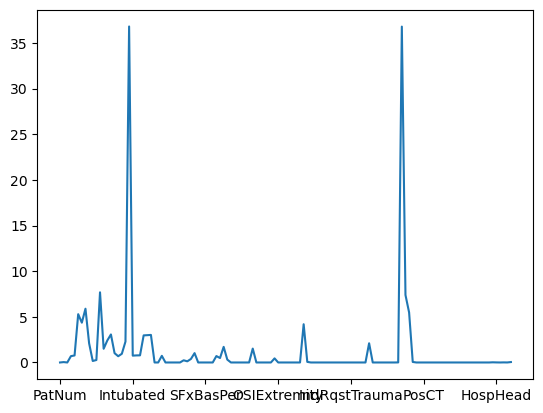

In [9]:
# The percentage of missing values per column
percentage_missing_per_column = (nas_per_column / len(df)) * 100
percentage_missing_per_column.plot()

# 2. Checking Datatypes of each column to change numbers stored as strings to numeric values

In [10]:
# Check the data types of all columns
print("Original Data Types:")
print(df.dtypes)

# Identify columns of type 'object' (which might store numbers as text)
object_cols = df.select_dtypes(include=['object']).columns
print("\nColumns that might store numbers as text:")
print(object_cols)

# Check for numeric values stored as text in those columns
for col in object_cols:
    mask = df[col].apply(lambda x: x.isdigit() if isinstance(x, str) else False)
    if mask.any():
        print(f"\nNumbers stored as text in column: {col}")
        print(df[col][mask])

# Convert columns with numeric strings to proper numeric types
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the conversion
print("\nUpdated Data Types after conversion:")
print(df.dtypes)


Original Data Types:
PatNum                  int64
EmplType              float64
Certification           int64
InjuryMech            float64
High_impact_InjSev    float64
                       ...   
HospHead              float64
HospHeadPosCT           int64
Intub24Head           float64
Neurosurgery          float64
PosIntFinal           float64
Length: 125, dtype: object

Columns that might store numbers as text:
Index([], dtype='object')

Updated Data Types after conversion:
PatNum                  int64
EmplType              float64
Certification           int64
InjuryMech            float64
High_impact_InjSev    float64
                       ...   
HospHead              float64
HospHeadPosCT           int64
Intub24Head           float64
Neurosurgery          float64
PosIntFinal           float64
Length: 125, dtype: object


In [11]:
df = df.dropna()

# 2. Lets make sure all the numbers are of the correct data type. If they are not of int64 / float64 datatypes and stored as an object instead we will convert them to numeric data

## Data Exploration

-   The main goal of this section is to give the reader a feel for what
    the data "looks like' ' at a basic level

-   Think about plots that summarize the data, plots that convey some
    smaller findings which ultimately motivate your main findings

-   A good report will tie everything together so that there is a reason
    for every figure in the story

# 1. Summary

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10529 entries, 0 to 43397
Columns: 125 entries, PatNum to PosIntFinal
dtypes: float64(48), int64(77)
memory usage: 10.1 MB


In [14]:
# The average number of missing values per column
avg_na_per_column = nas_per_column.mean()
avg_na_per_column

524.672

In [15]:
df_no_nas= df.dropna()
df_no_nas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10529 entries, 0 to 43397
Columns: 125 entries, PatNum to PosIntFinal
dtypes: float64(48), int64(77)
memory usage: 10.1 MB


In [16]:
# The percentage of missing values per column
percentage_missing_per_column = (nas_per_column / len(df)) * 100
percentage_missing_per_column

PatNum                0.000000
EmplType              0.170956
Certification         0.000000
InjuryMech            2.858771
High_impact_InjSev    3.172191
                        ...   
HospHead              0.028493
HospHeadPosCT         0.000000
Intub24Head           0.037990
Neurosurgery          0.009498
PosIntFinal           0.189952
Length: 125, dtype: float64

In [17]:
# Since the percentage of missing values are low I will keep all the variables

In [18]:
df = df.dropna()

# Findings

-   Present three interesting findings and produce a publication quality
    graphic for each along with a short caption of what each shows.

-   Don't forget to appropriate label axes, titles

-   Think carefully about use of color, labeling, shading, transparency,
    etc.

-   Also interpret and provide an insightful discussion of what your
    figures show

# Finding 1:

#### This finding shows that even for High Impact Injuries rated 3.0, when CT is Done, only 13% required surgeries. In fact 86% of the time when CT is done and HigImpactInjSev is 3.0, there is no surgery required. 

In [19]:
# the frequency of CT done in each risk category
CT_done_frequency = df.groupby('High_impact_InjSev')['CTDone'].value_counts(normalize=True).unstack().fillna(0)
print("CT done Frequency by Risk Level:\n", CT_done_frequency)

CT done Frequency by Risk Level:
 CTDone                     0         1
High_impact_InjSev                    
1.0                 0.796107  0.203893
2.0                 0.752490  0.247510
3.0                 0.657367  0.342633


In [20]:
# the frequency of ciTBI needed in each risk category
ciTBI_frequency = df.groupby('High_impact_InjSev')['PosCT'].value_counts(normalize=True).unstack().fillna(0)
print("ciTBI Frequency by Risk Level:\n", ciTBI_frequency)

ciTBI Frequency by Risk Level:
 PosCT                     0         1         92
High_impact_InjSev                              
1.0                 0.198770  0.005123  0.796107
2.0                 0.240377  0.007133  0.752490
3.0                 0.325196  0.017437  0.657367


In [21]:
combined_frequency = df.groupby(['High_impact_InjSev', 'CTDone'])['PosCT'].value_counts(normalize=True).unstack().fillna(0)
print("Combined CT done and ciTBI Frequency by Risk Level:\n", combined_frequency)


Combined CT done and ciTBI Frequency by Risk Level:
 PosCT                            0         1    92
High_impact_InjSev CTDone                         
1.0                0       0.000000  0.000000  1.0
                   1       0.974874  0.025126  0.0
2.0                0       0.000000  0.000000  1.0
                   1       0.971180  0.028820  0.0
3.0                0       0.000000  0.000000  1.0
                   1       0.949109  0.050891  0.0


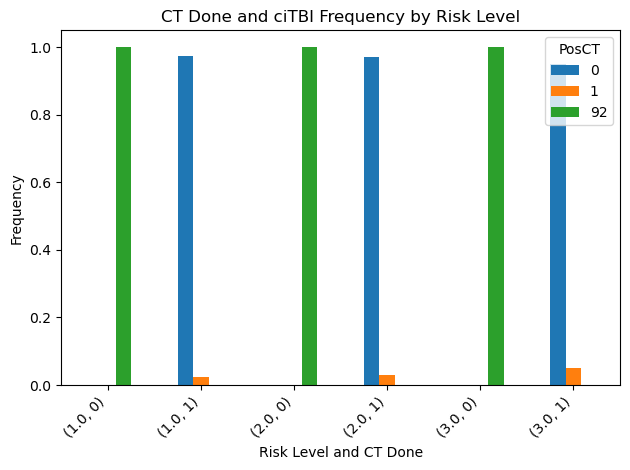

In [22]:
combined_frequency.plot(kind='bar', stacked=False)
plt.title('CT Done and ciTBI Frequency by Risk Level')
plt.xlabel('Risk Level and CT Done')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Finding 2: 

#### The table below shows that when CT was Done, most of the times it was not necessary Clinically Important TBI as PostIntFinal was never more than 8% in even the worst case that we can see above.

In [23]:
PosIntFinal_frequency = df.groupby(['High_impact_InjSev', 'CTDone'])['PosIntFinal'].value_counts(normalize=True).unstack().fillna(0)
# print("Combined PosIntFinal, CT done and ciTBI by Risk Level :\n", PosIntFinal_frequency)
PosIntFinal_frequency

PosIntFinal                     0.0       1.0
High_impact_InjSev CTDone                    
1.0                0       1.000000  0.000000
                   1       0.992462  0.007538
2.0                0       1.000000  0.000000
                   1       0.985862  0.014138
3.0                0       1.000000  0.000000
                   1       0.982188  0.017812

<Figure size 1000x600 with 0 Axes>

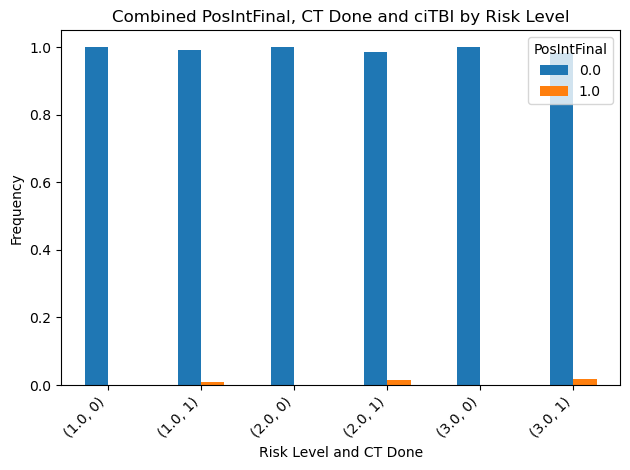

In [24]:
plt.figure(figsize=(10,6))
PosIntFinal_frequency.plot(kind='bar', stacked=False)
plt.title('Combined PosIntFinal, CT Done and ciTBI by Risk Level')
plt.xlabel('Risk Level and CT Done')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Finding 3
#### This shows how most of the times there is CT done, there is no Surgery Done. When we examine professions who recommned the CT, the highest rate is shown to be 2.0 [Physician Assistant]. We find that 98% of the time a Physician Assistant recommends CT, 98% of the time it does lead to a surgery. The best rate is 90% and it is for a Fellow.

In [25]:
ans = df.groupby(['EmplType', 'CTDone'])['PosCT'].value_counts(normalize=True).unstack().fillna(0)
ans

PosCT                  0         1    92
EmplType CTDone                         
1.0      0       0.000000  0.000000  1.0
         1       0.972222  0.027778  0.0
2.0      0       0.000000  0.000000  1.0
         1       0.963855  0.036145  0.0
3.0      0       0.000000  0.000000  1.0
         1       0.971816  0.028184  0.0
4.0      0       0.000000  0.000000  1.0
         1       0.955882  0.044118  0.0
5.0      0       0.000000  0.000000  1.0
         1       0.968012  0.031988  0.0

<Figure size 1000x600 with 0 Axes>

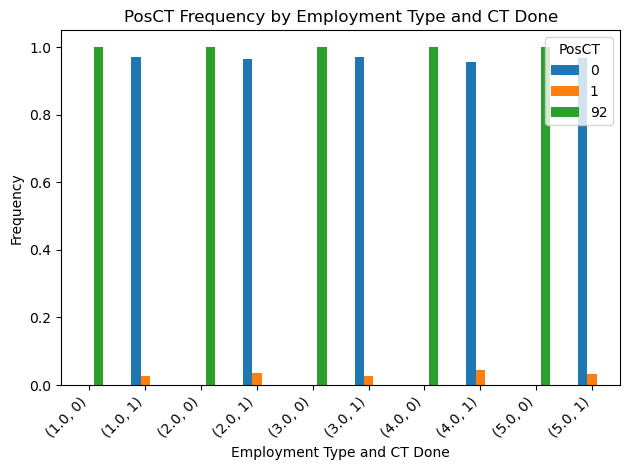

In [26]:
plt.figure(figsize=(10,6))
ans.plot(kind='bar', stacked=False)
plt.title('PosCT Frequency by Employment Type and CT Done')
plt.xlabel('Employment Type and CT Done')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Reality Check

-   Do a reality check. What reality could you compare your cleaned data
    to?

-   Clearly state your assumptions and explain why this reality check is
    useful.

-   Does your cleaned data pass the reality check or are there issues?
    Discuss.



In my findings, I noted that a significant percentage of CT scans performed in cases of high-impact injuries did not result in surgeries and that even when CT scans were done, the rate of clinically important traumatic brain injuries (ciTBI) was quite low. Additionally, I highlighted that specific medical professionals, such as Physician Assistants, recommend CT scans more frequently, yet these recommendations do not always correlate with a high necessity for surgery.

Connecting these findings to the discussions in the Kuppermann et al. (2009) paper, we can see a clear alignment with their focus on identifying cases where CT scans may be unnecessary. The study emphasizes the importance of reducing unnecessary CT scans, especially given the associated risks of radiation exposure in children. The paper's findings suggest that a substantial number of children who receive CT scans for head trauma do not have clinically important injuries, which correlates with your observation that CT scans often do not lead to surgeries or reveal critical injuries.

Moreover, the data on the overuse of CT scans by certain professionals aligns with the paper's discussion on the variability of CT scan usage and the need for better clinical decision-making tools. Kuppermann et al. (2009) advocate for the use of predictive rules to identify patients at very low risk of ciTBI, which could help mitigate the overuse of CT scans—precisely the issue my findings touch upon regarding the high rate of CT scan recommendations not leading to surgery.

This connection underscores the importance of critical evaluation and judicious use of CT scans, particularly by professionals whose practices may contribute to overuse, as identified in your analysis. The reality check here is that while CT scans are a valuable diagnostic tool, their application must be carefully considered to avoid unnecessary procedures that do not contribute to better patient outcomes.

## Stability Check

Take one of your findings and present a perturbed version. How does this
affect your finding? Add a before and after plot here.

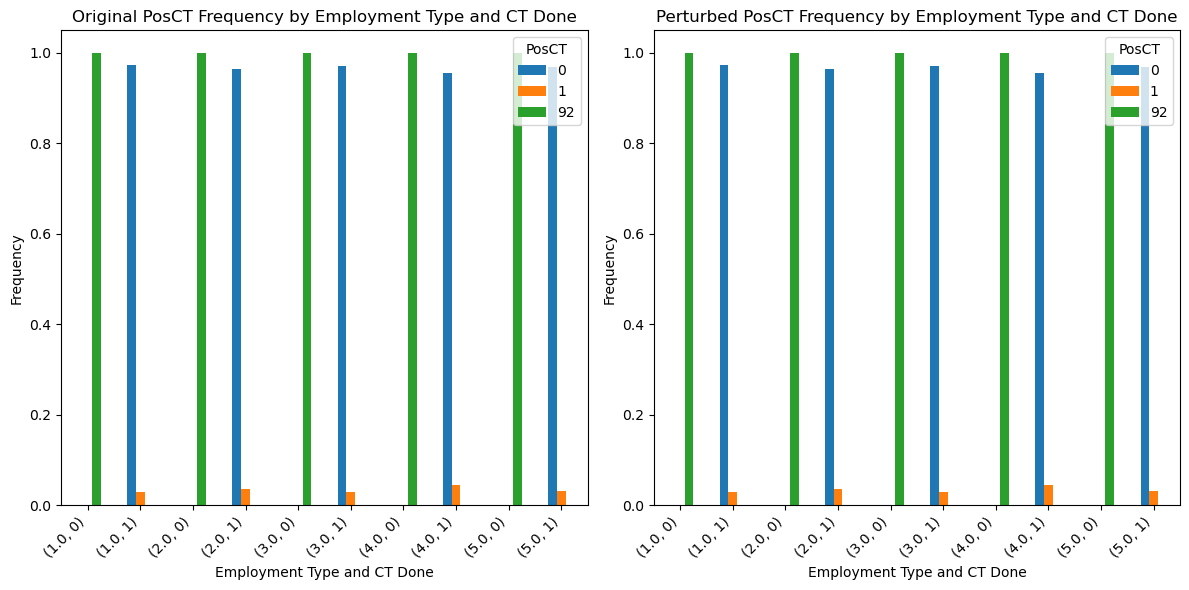

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your original DataFrame

# Original analysis - group by EmplType and CTDone, calculate normalized PosCT value counts
original_ans = df.groupby(['EmplType', 'CTDone'])['PosCT'].value_counts(normalize=True).unstack().fillna(0)

# Perturbed analysis - shuffle PosCT values within each group
df_perturbed = df.copy()
df_perturbed['PosCT'] = df.groupby(['EmplType', 'CTDone'])['PosCT'].transform(np.random.permutation)

perturbed_ans = df_perturbed.groupby(['EmplType', 'CTDone'])['PosCT'].value_counts(normalize=True).unstack().fillna(0)

# Plot original findings
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
original_ans.plot(kind='bar', ax=plt.gca(), stacked=False)
plt.title('Original PosCT Frequency by Employment Type and CT Done')
plt.xlabel('Employment Type and CT Done')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Plot perturbed findings
plt.subplot(1, 2, 2)
perturbed_ans.plot(kind='bar', ax=plt.gca(), stacked=False)
plt.title('Perturbed PosCT Frequency by Employment Type and CT Done')
plt.xlabel('Employment Type and CT Done')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# To demonstrate how a perturbation might affect these findings, let's say we randomly shuffle the PosCT values within each EmplType and CTDone group to perturb the relationship between employment type and CT result. This would introduce noise and break the original pattern of higher/lower PosCT frequencies for specific group but there was no visible change after pertubation for this finding

# Discussion

-   Did the data size restrict you in any way? Discuss some challenges
    that you faced as a result of the data size.

-   Address the three realms: data / reality, algorithms / models, and
    future data / reality.

-   Where do the parts of the lab fit into those three realms?

-   Do you think there is a one-to-one correspondence of the data and
    reality?

-   What about reality and data visualization?

In our research, the extensive data size we worked with presented both opportunities and challenges. The dataset, encompassing over 42,000 children presenting with head trauma across 25 North American emergency departments, allowed for robust statistical analysis and the derivation of highly sensitive clinical prediction rules. However, the sheer volume of data also posed challenges, particularly in terms of processing and managing it effectively. We encountered issues with data integration, ensuring consistency across various sources, and the computational resources needed for analysis.

Data / Reality
The relationship between data and reality is complex. While our dataset offers a broad representation of pediatric head trauma cases, it may not encompass all nuances of individual patient circumstances. This limitation raises questions about whether our findings can be universally applied. Moreover, factors like regional practice variations or differences in healthcare access might influence outcomes that our dataset does not capture. Thus, while data provides valuable insights, it does not fully encapsulate the reality of every clinical situation.

Future Data / Reality
Looking ahead, we recognize the importance of incorporating future data that reflects evolving clinical practices and advancements in technology. As we collect more data, we should also consider the diversity of patient populations and their specific characteristics. This will enhance our models and improve their applicability in varied healthcare settings. The ongoing collection of real-world data will help bridge the gap between our predictive models and the realities faced by clinicians on the ground.

Fit within the Three Realms
In our lab work, the parts of our study fit neatly into these three realms. The data we analyzed provided the foundation for our algorithms, allowing us to derive meaningful models. As we transition from our findings to their application in clinical settings, we must ensure that our models align with the real-world complexities that healthcare professionals encounter.

One-to-One Correspondence
We believe there isn't a one-to-one correspondence between data and reality. While data can highlight trends and patterns, it often fails to account for the intricacies of individual patient experiences. This disconnect can lead to oversimplifications if not approached with caution.

Reality and Data Visualization
Data visualization plays a crucial role in bridging the gap between reality and data. Effective visualization helps convey our findings clearly and can highlight areas where further exploration is needed. By presenting data in an accessible manner, we can foster better understanding and facilitate discussions among clinicians, ultimately improving decision-making in pediatric head trauma cases.

In conclusion, while our research has provided valuable insights into reducing unnecessary CT scans in children with head trauma, we must remain aware of the limitations posed by data size and strive to continuously align our findings with the complexities of clinical reality.

### Data Size and Its Impact:

#### 1. **Data/Reality Realm:**
The size of the dataset can impact how accurately the data reflects reality. In a smaller dataset:
- **Challenges**:
  - **Bias**: The dataset might not represent the entire population or scenario well enough, leading to biased findings.
  - **Outliers**: With fewer data points, outliers might have a larger impact, skewing results.
  - **Granularity**: A smaller sample limits the level of detail you can extract from the data, potentially missing key insights.
- **Effect on this lab**: If our dataset was small, the statistical strength of the findings might be weak, making it harder to generalize results to the larger population. For example, grouping by categories such as `EmplType` or `CTDone` might result in some categories having very few observations, leading to less reliable conclusions.

#### 2. **Algorithms/Models Realm:**
The size of the data can also affect how well algorithms or models perform.
- **Challenges**:
  - **Overfitting**: With limited data, models might overfit to noise or patterns specific to the small dataset, reducing generalization to future data.
  - **Limited Training**: For complex models, smaller data provides less information to train on, leading to poorer predictions.
  - **Handling sparse data**: If certain combinations of categories like `EmplType` and `CTDone` are rare, the models may struggle to make accurate predictions or fail to find meaningful patterns.
- **Effect on this lab**: In the grouping example, you may find that the `value_counts(normalize=True)` operation returns uneven proportions across categories, which could lead to skewed bar plots or patterns that are misleading. The algorithm’s ability to find meaningful group differences would be hampered.

#### 3. **Future Data/Reality Realm:**
If your data size is small or not representative, it may not generalize well to future data or unseen situations.
- **Challenges**:
  - **Inaccurate Predictions**: Small datasets can lead to conclusions that are less likely to hold up in future observations.
  - **Changing Reality**: If the data is too sparse or old, it may not reflect current trends and realities, leading to misleading future inferences.
- **Effect on this lab**: If you're making decisions or predictions based on this data (e.g., predicting who might need a CT scan based on risk factors), the limited size could affect how well these predictions work on future cases. Future data might have more variety and complexity than the dataset used.

### Lab Components and the Three Realms:
- **Data/Reality**: The part of the lab where you analyzed actual clinical data (`EmplType`, `CTDone`, `PosCT`, etc.) fits in this realm. The extent to which this data mirrors real-world medical trends affects the validity of the conclusions.
- **Algorithms/Models**: The methods you used to analyze the data, such as calculating value counts or grouping by different variables, fit here. If the data size restricted these analyses, it could lead to unreliable or overfitted models.
- **Future Data/Reality**: Any conclusions you derive about how `PosCT` outcomes are influenced by factors like employment type or CT decisions may not generalize to future data unless the dataset is robust enough.

### One-to-One Correspondence of Data and Reality:
- **No, there isn’t a perfect one-to-one correspondence**. Data is a simplified representation of reality, filtered through the variables and measurements we choose to record. There are often unmeasured factors influencing the outcomes, and data collection errors or biases may introduce noise. In this context, variables like `EmplType` and `CTDone` may capture only a fraction of the complex reality that determines `PosCT` outcomes (e.g., patient health factors, environmental variables).

### Reality and Data Visualization:
- **Visualizations simplify and abstract reality even further**. While visualizations like bar plots are powerful tools for understanding trends, they often hide nuances and may create misleading impressions if the underlying data is sparse or biased. For example:
  - Bar plots might emphasize differences between categories (like `EmplType` and `PosCT`) that are not statistically significant in reality.
  - Overlapping categories or uncertainties may not be fully visible in a bar plot, leading to oversimplified interpretations.
  
In summary, while data visualization is valuable for insight, it can distort the underlying reality if the data is too limited, unbalanced, or unrepresentative. Data size and quality are crucial to ensure that the visualized trends are meaningful and reliable.

# Conclusion

In summary, our study underscores the critical need for judicious use of CT scans in pediatric head trauma cases. By leveraging a substantial dataset of over 42,000 children, we successfully developed and validated age-specific clinical prediction rules that identify those at very low risk for clinically important traumatic brain injuries (ciTBI). This not only has the potential to reduce unnecessary radiation exposure but also empowers clinicians to make more informed decisions in emergency settings.

However, our findings also reveal the complexities inherent in translating data into clinical practice. The relationship between data and reality is nuanced, and while our algorithms provide valuable insights, they cannot fully encapsulate the unique circumstances of each patient. As we move forward, it is essential to refine our models with ongoing data collection that reflects diverse patient populations and evolving healthcare practices.

Moreover, the role of data visualization cannot be overstated; it serves as a vital tool in bridging the gap between our findings and clinical reality. By effectively communicating our results, we can foster collaboration among healthcare professionals, enhancing patient care.

Ultimately, our research contributes to a growing body of evidence advocating for a more thoughtful and evidence-based approach to diagnostic imaging in children. By prioritizing the reduction of unnecessary CT scans, we aim to improve patient outcomes while safeguarding the well-being of vulnerable populations. As we continue this vital work, we remain committed to aligning our predictive models with the realities faced by clinicians, ensuring that our findings translate into meaningful improvements in pediatric healthcare.

# Academic honesty statement

# Collaborators

# Bibliography